<a href="https://colab.research.google.com/github/ferreiramar96/Analise-Dos-Dados-Airbnb-NYC/blob/main/An%C3%A1lise_Dos_Dados_Airbnb_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - *Nova York***

O [Airbnb](https://www.airbnb.com.br/) é uma plataforma para alugar acomodação por temporada e promover experiências únicas. Só que tem um fato curioso sobre esta empresa, **eles não possuem nenhum hotel**!

A empresa ajuda a tornar o compartilhamento fácil, agradável e seguro. Perfis pessoais e anúncios são verificados, eles matém um sistema de mensagens inteligente para que anfitriões e hóspedes possam se comunicar com segurança e gerenciam uma plataforma confiável para recolher e transferir pagamentos.

Em meados de 2021, A Startup fundada 13 anos atrás(2008), chegou a marca impressionante de **1 bilhão de pessoas hospedadas**, e bem na semana em que se comemora o Dia Mundia do Turismo.

Uma das iniciativas do Airbnb é disponibilizar dados de sua empresa em algumas cidades. Por meio do site [Inside Airbnb](http://insideairbnb.com/get-the-data/), Dessa forma sendo possivel realizar o download desses dados e serem feitos projetos e análise de dados de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


<center><b>O PROJETO A SEGUIR SERÁ REALIZADO UTILIZANDO OS DADOS DO AIRBNB DE NOVA YORK</b></center>


<img src="new_york_city_10.png"/>

Segundo o site [Melhores Destinos](https://www.melhoresdestinos.com.br/cidades-mais-visitadas-do-mundo.html) a cidade de Nova York é impressionante por diversos motivos. É um lugar onde ao lado de arranha-céus, vivem parques extremamente arborizados. Além disso temos também vários pontos turísticos como: A Estátua da Liberdade, Times Square, Central Park e Empire State, Entre muitos outros.

Com **mais de 50 milhões de visitantes por ano**, mais de 8 milhões de moradores, mais de 400 estações de metrô, milhares de restaurantes, diversos museus, muitas lojas e uma infinidade de pontos turísticos para conhecer - Nova York é assim, uma das cidades mais espetaculares do mundo, com uma variedade incrível de coisas para ver e fazer. Ela é a **cidade mais populosa dos Estados Unidos**, cenário de centenas filmes e um destino capaz de agradar pessoas com gostos completamente distintos.

Como a cidade é muito visitada, é importante obtermos informações à respeito dos imóveis.Imagine que você queira visita-la, mas não tem nenhuma informação sobre preço das diárias dos hoteis, quantos dias ficar na cidade, quais os mais caros ou mais baratos, etc. Sendo assim, uma análise exploratória dos dados se faz crucial. Este é o objetivo do presente projeto.

## **Obtenção dos Dados**

Todos os dados foram retirados do site do [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Está é uma versão dos dados atualizados de 2019

In [4]:
# Importando os pacotes nescessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [5]:
# Importandos os dados para o nosso notebook
df = pd.read_csv('https://raw.githubusercontent.com/ferreiramar96/Analise-Dos-Dados-Airbnb-NYC/main/airbnb_nyc_2019.csv')

## **Análise dos Dados**

Começando aqui nossa análise de dados, para podermos extrair informações relevantes para quem quiser conhcer uma das maiores cidades americana.

**Colunas do Dataset**

* `id` - Identificador do registro na base de dados
* `name` - Nome do Anúncio na plataforma do Airbnb
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Região da Cidade de Nova York
* `neighbourhood` - Bairro (Está dentro de uma das Regiões)
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipo da Locação (Quarto, Casa inteira, etc)
* `price` - Preço do aluguel (diária)
* `minimum_nights` - Diárias Mínimas para Locação
* `number_of_reviews` - Quantidade de Avaliações
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de Anúncios do Host do Imóvel
* `availability_365` - Tempo (dias) em que o anúncio está disponível


A seguir vamos verificar as 5 primeiras linhas do nosso dataset

In [6]:
#Mostrando 5 primeiras linhas do nosso conjunto de dados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


* Para realizar uma análise mais clara, vou converter o valor de dólares para reais. Para podermos ter uma base melhor, de qual valor estamos falando em nossa realidade

In [7]:
#Criando nova coluna
df['Preço em R$'] = df['price'] * 5.05

Coluna criada, cujo o valor atual do dolar é R$5,05

### **Q1. Quantas colunas(váriaveis) e quantas linhas(entradas) o nosso dataset possui? E quais são os tipos de dados que nós temos?**

In [8]:
#Vendo as linhas e colunas 
print(f'Colunas: {df.shape[1]}')
print(f'Linhas: {df.shape[0]}')

Colunas: 17
Linhas: 48895


In [9]:
#Verificando os tipos de dados
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Preço em R$                       float64
dtype: object

* Podemos observar que esse nosso dataset possui um total de 48.895 linhas e 17 colunas. E os tipos dos dados são: Inteiro, Float e Objeto

### **Q2. Qual a porcentagem de valores ausentes  no dataset?**

In [10]:
#Organizando de forma decrescente a porcentagem de dados faltantes de cada coluna 
((df.isnull().sum() / df.shape[0]).sort_values(ascending=False)) * 100

reviews_per_month                 20.558339
last_review                       20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
minimum_nights                     0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
room_type                          0.000000
price                              0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
Preço em R$                        0.000000
dtype: float64

* É possível observar que as colunas `reviews_per_month` e `last_review` tem exatamente 20,55% dos dados ausentes. 



* E as colunas `host_name` e `name` tem pouca coisa de dados ausentes. E as demais colunas, nenhuma tem dados faltantes

### **Q3. Distribuição das variáveis**

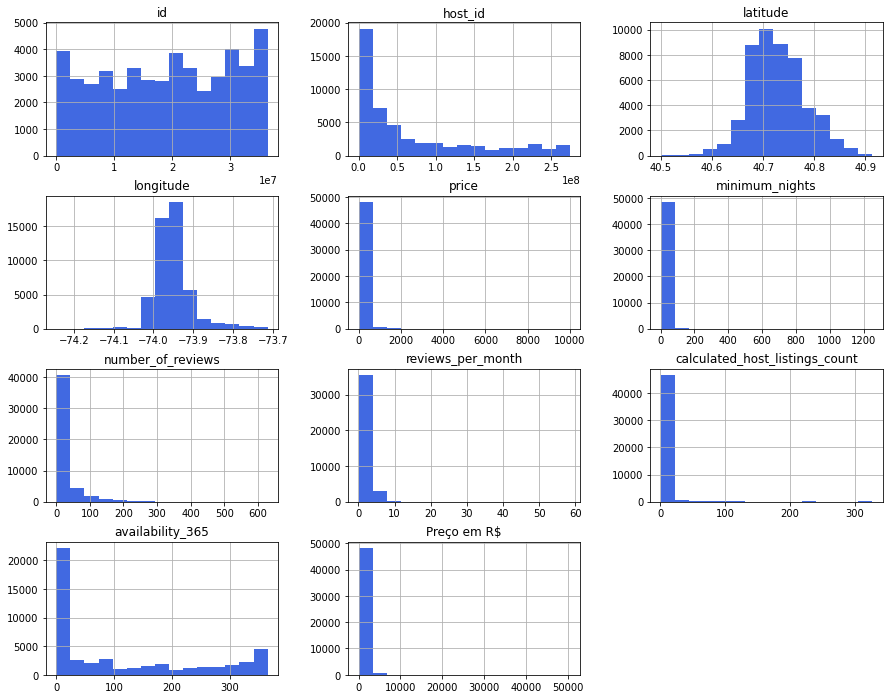

In [11]:
#Criando histógrama de todas as váriaveis numéricas
df.hist(bins=15, figsize=(15, 12), color='royalblue')
plt.show()

* Ao realizarmos a observação das distribuições, percebemos que a maioria das variáveis são assimétricas a direita. 

* Sendo assim, provavelmente existem valores discrepantes em relação às variáveis, `price`, `Preço em R$`, `minimum_nights`, `calculated_host_listings_count`. 

* A seguir vou fazer uma análise estatística descritiva e logo em seguida plotarei seus boxplots.

### **Q4. Existem valores Discrepantes(Outliers)?**

In [12]:
df[['price', 'Preço em R$', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,Preço em R$,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,771.239470,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,1212.778557,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,348.450000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,535.300000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,883.750000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,50500.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* De acordo com a tabela acima, podemos confirmar que existem valores outliers em nosso dataset. Observem que na coluna `minimum_nights` o valor máximo é igual a 1250, muito superior aos dias de um ano. 

E na coluna de preço, 75% do mesmo está abaixo de 834.75 reais, e o seu valor máximo é R$ 47.700

#### **Boxplot Preço em R$**

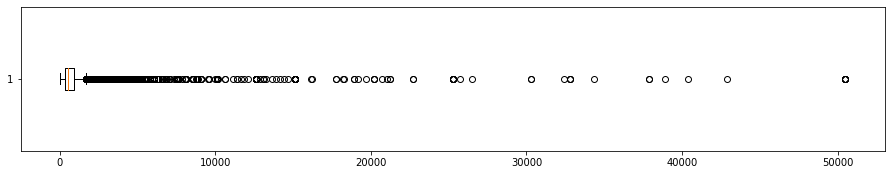

Valores acima de 4000:
499 entradas
1.02%


In [13]:
fig = plt.figure(figsize=(12,2))
ax = fig.add_axes([0,0,1,1])
ax.boxplot(df['Preço em R$'], vert=False)
plt.show()

print('Valores acima de 4000:')
print('{} entradas'.format(len(df[df['Preço em R$'] > 4000])))
print('{:.2f}%'.format((len(df[df['Preço em R$'] > 4000]) / df.shape[0])*100))

* Observando o BoxPlot, vemos que existem muitos valores que estão fora do padrão(outliers). Um aluguel de 4000 já é uma valor bem alto, os valores que passam disso não fazem o menor sentido para o nosso dataset, pois quando fazemos a média desses valores, esses dados tem grande peso.

#### **Boxplot minimum_nights**

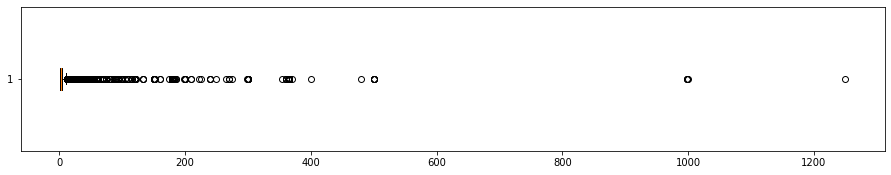

Valores acima de 30:
747 entradas
1.53%


In [14]:
fig = plt.figure(figsize=(12,2))
ax = fig.add_axes([0,0,1,1])
ax.boxplot(df['minimum_nights'], vert=False)
plt.show()

print('Valores acima de 30:')
print('{} entradas'.format(len(df[df['minimum_nights'] > 30])))
print('{:.2f}%'.format((len(df[df['minimum_nights'] > 30]) / df.shape[0])*100))

* Podemos observar que acima de 30 noites, já são valores extremamente discrepantes. Pois não faz sentido um aluguel com um mínimo de mais de 30 dias para poder alugar.

#### **Tratando Valores Outliers**

In [15]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean['Preço em R$'] > 4000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 792].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

* Na célula acima criei uma nova variável e fiz uma cópia do nosso dataset, para poder fazer alterações sem mexer no DataFrame original
* Fiz uma limpeza no dados, da coluna "Preço em R$" onde os valores que eram maiores que 4000.

* Fiz uma limpeza no dados, da coluna "minimum_nights" onde os valores que eram maiores que 30.

* Após ter removido os valores outliers, vamos plotar novamente o seu histograma

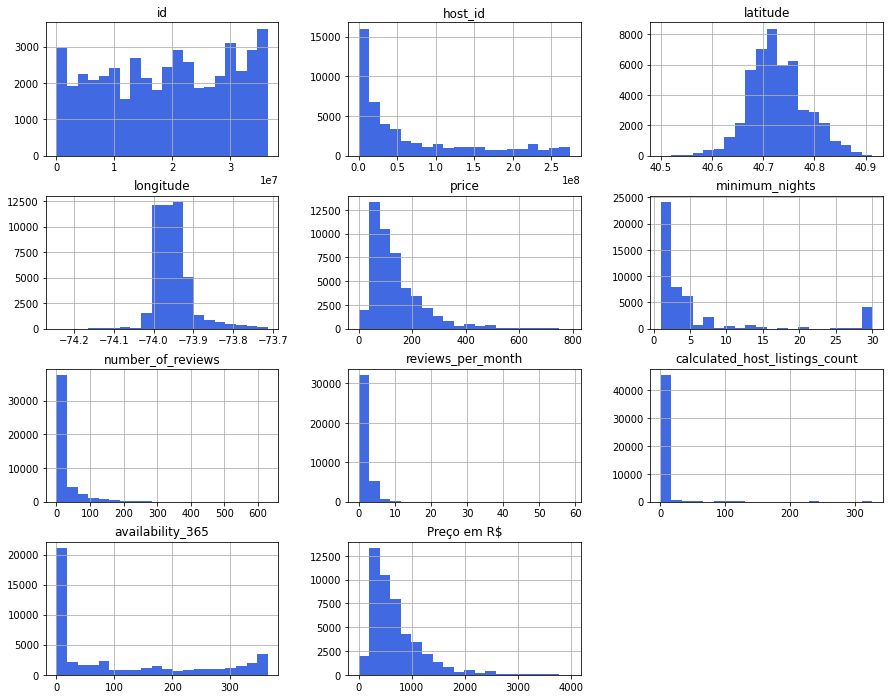

In [32]:
df_clean.hist(bins=20, figsize=(15, 12), color='royalblue')
plt.show()

* De maneira muito mais clara, podemos observar os histogramas e que grande parte do intervalo do `Preço em R$` está entre 150 e 750 reais. A quantidade de imóveis com preço maior que isso é bem menor.

* Finalmente com os valores livres de outliers, é possível extrair informações valiosas para quem quiser passear em Nova York. A seguir farei algumas perguntas relevantes aos dados.

### **Q5. Existe alguma correlação entre as variáveis?**

Atravéz da correlação podemos descobrir se há algum ligamento ou relação entre duas ou mais variáveis. Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela.

Para identificar as correlações existentes, vou:
* Criar uma matriz de correlação
* Gerar um *mapa de calor* utilizando a matriz



In [17]:
#Criando a matriz
corr = df_clean[['price', 'Preço em R$' ,'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,Preço em R$,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,1.000000,0.055353,-0.055579,-0.028224,0.152311,0.109050
Preço em R$,1.000000,1.000000,0.055353,-0.055579,-0.028224,0.152311,0.109050
minimum_nights,0.055353,0.055353,1.000000,-0.149157,-0.217262,0.332440,0.242785
number_of_reviews,-0.055579,-0.055579,-0.149157,1.000000,0.549333,-0.072980,0.180028
reviews_per_month,-0.028224,-0.028224,-0.217262,0.549333,1.000000,-0.009428,0.193048
calculated_host_listings_count,0.152311,0.152311,0.332440,-0.072980,-0.009428,1.000000,0.229863
availability_365,0.109050,0.109050,0.242785,0.180028,0.193048,0.229863,1.000000


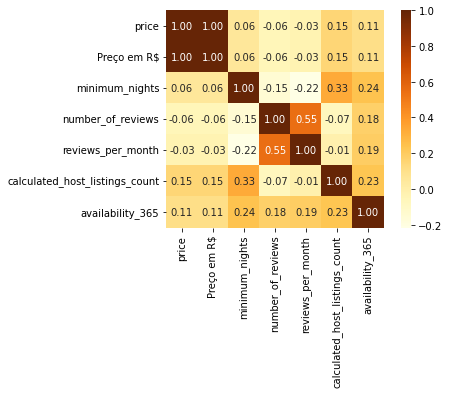

In [18]:
sns.heatmap(corr, cmap='YlOrBr', fmt='.2f', square=True, linecolor='white', annot=True)

* Quando olhamos para esse mapa de calor, intuitivamente já deduzimos que as cores mais fortes, tendem a ter uma correlação maior. 
* Os valores que estão mais próximos de 1, tem uma correlação maior.
* Os que abaixo de 0.4, não possuim quase que nenhuma ligação.

### **Q6. Algumas Perguntas Relevantes**

#### **Qual o valor médio do aluguel na cidade de Nova York?**

In [19]:
#Fazer a média dos preços
print('Média em R$: {:.2f}'.format(df_clean['Preço em R$'].mean()))
print('Média em US$: {:.2f}'.format(df_clean['price'].mean()))

Média em R$: 692.83
Média em US$: 137.19


* A média dos preço do aluguel diário na cidade de Nova York é de 137.19 dolares, que é equivalente a aproximadamente 692.83 reais


#### **Quais os nomes das regiões que existem na cidade de Nova York?**

In [20]:
#Vamos ver o nome das regiões únicas da coluna "neighbourhood_group"
unicos = df_clean['neighbourhood_group'].unique()
print('As regiõs em Nova York são:')

for regiao in unicos:
    print(regiao)

As regiõs em Nova York são:
Brooklyn
Manhattan
Queens
Staten Island
Bronx


#### **Qual o valor do aluguel diário mais caro da cidade de Nova York?**

In [21]:
#Ver o valor máximo do aluguel diário em Dolar e em Reais
print('Mais caro em Dolar: {}'.format(df_clean['price'].max()))
print('Mais caro em Reais: {:.2f}'.format(df_clean['Preço em R$'].max()))

Mais caro em Dolar: 790
Mais caro em Reais: 3989.50


#### **Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?**


In [22]:
#Para respondermos essa pergunta, vamos utilizar a coluna 'room_type'
unico = df_clean['room_type'].unique()
print('Os tipos de locações que existem são: ')

for tipo in unico:
    print(tipo)

Os tipos de locações que existem são: 
Private room
Entire home/apt
Shared room


Os tipos acima correspondem a: 
* `Private room` - Apenas um quarto
* `Entire home/apt` - Apartamento inteiro
* `Shared room` - Quarto compartilhado

#### **Existem mais imóveis baratos ou caros?**

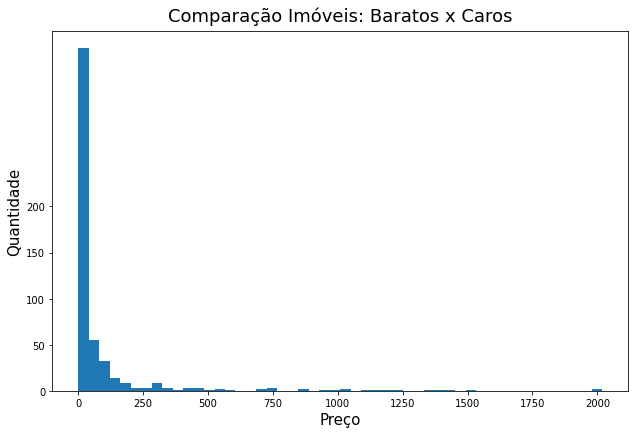

In [23]:
#Vamos fazer uma vizualização para um mais fácil entendimento
df_org = df_clean['price'].value_counts()

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0,0,1,1])

ax.set_title('Comparação Imóveis: Baratos x Caros', fontsize=18, pad=10)
ax.set_xlabel('Preço', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15)

ax.set_yticks([0, 50, 100, 150, 200])
ax.set_yticklabels(['0', '50', '100', '150', '200'])

ax.hist(df_org, bins=50)
plt.show()

* Apartir desse histograma, percebemos que existem mais imovéis considerados 'baratos', do que os 'caros'. Ficando a maioria entre USS 30(RS 151,50) a USS 200(RS 1010).



#### **Qual é o valor do aluguel mais caro de cada região? E o mais barato?**

In [24]:
#Mais caro por região
df_max = (df_clean.groupby('neighbourhood_group')['price'].max()).sort_values(ascending=False)
df_maxr = (df_clean.groupby('neighbourhood_group')['Preço em R$'].max()).sort_values(ascending=False)

print('Em dolar: {}'.format(df_max))
print('\nEm Real: {}'.format(df_maxr))

Em dolar: neighbourhood_group
Manhattan        790
Brooklyn         789
Queens           750
Staten Island    700
Bronx            680
Name: price, dtype: int64

Em Real: neighbourhood_group
Manhattan        3989.50
Brooklyn         3984.45
Queens           3787.50
Staten Island    3535.00
Bronx            3434.00
Name: Preço em R$, dtype: float64


In [25]:
#Mais barato por região
price = df_clean[df_clean['price'] > 0]
preco = df_clean[df_clean['Preço em R$'] > 0]

df_min = price.groupby('neighbourhood_group')['price'].min()
df_minr = preco.groupby('neighbourhood_group')['Preço em R$'].min()

print('Em dolar: {}'.format(df_min))
print('\nEm Real: {}'.format(df_minr))

Em dolar: neighbourhood_group
Bronx            10
Brooklyn         10
Manhattan        10
Queens           10
Staten Island    13
Name: price, dtype: int64

Em Real: neighbourhood_group
Bronx            50.50
Brooklyn         50.50
Manhattan        50.50
Queens           50.50
Staten Island    65.65
Name: Preço em R$, dtype: float64


#### **Qual a soma dos valores do aluguel por região? E qual o mais caro?**

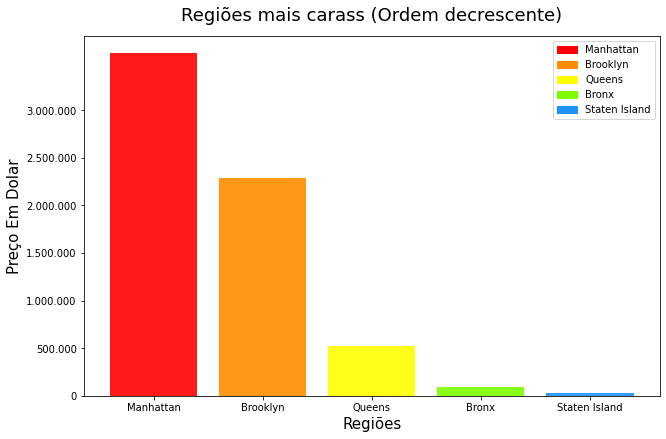

neighbourhood_group
Manhattan        3600252
Brooklyn         2288252
Queens            527844
Bronx              90265
Staten Island      34515
Name: price, dtype: int64


In [26]:
#Vamos plotar um gráfico de barras para melhor vizualização
cores = {'Manhattan': 'red',
         'Brooklyn': 'darkorange',
         'Queens': 'yellow',
         'Bronx': 'lawngreen',
         'Staten Island':'dodgerblue'}
labels = list(cores.keys())

y = (df_clean.groupby('neighbourhood_group')['price'].sum()).sort_values(ascending=False)

fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([1,1,1,1])

ax.bar(labels, y, color=cores.values(), alpha=0.9)
ax.set_title('Regiões mais carass (Ordem decrescente)', fontsize=18, pad=15)
ax.set_xlabel('Regiões', fontsize=15)
ax.set_ylabel('Preço Em Dolar', fontsize=15)

ax.set_yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000])
ax.set_yticklabels(['0', '500.000', '1.000.000', '1.500.000', '2.000.000', '2.500.000', '3.000.000'])

handles = [plt.Rectangle((0,0),1,1, color=cores[label]) for label in labels]
ax.legend(handles, labels)
plt.show()

print(y)

Observando o gráfico, chegamos a conclusão que a região mais cara de Nova York é a de Manhattan, vejamos a seguir o por que.

### **Por que Manhattan é a região mais cara?**

Considerado o coração de Nova York, Manhattan é um distrito rico, cosmopolita e efervescente, que apresenta bem o que esperar de uma viagem à chamada Big Apple, na Costa Leste dos Estados Unidos. Recebendo um total de 34,6 milhões de visitantes no ano de 2021.


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<img src="https://images.alphacoders.com/102/1026379.jpg"/>


Manhattan possui alguns dos pontos turisticos mais movimentados do mundo, tais como: 
* `Times Square` -  É uma imensa avenida onde letreiros coloridos e outdoors chamativos disputam espaço com artistas de rua, lojas, trânsito e várias atrações incríveis, onde mais de 300 mil pessoas visitam a avenida todos os dias.


* `Central Park` - O parque mais famoso do planeta ocupa uma área de mais de 3,4 km² no coração da cidade, como se fosse um grande oásis em meio à selva urbana.


* `Empire State Building` - Um dos edifícios mais famosos do mundo, o Empire State Building foi construído no começo da década de 1930 e reinou absoluto sobre Nova York até meados da década de 1972, quando as Torres Gêmeas foram construídas


* `Museus` - Os principais museus de Nova York ficam no distrito, como o Metropolitan Museum of Art (MET), o Museu de Arte Moderna (MoMa) e o Whitney Museum of Art.



Devidos a essas e muitas outras atrações, que contribuem para que Manhattan se torne a região mais cara de Nova York.

### **Q6. Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro?**

Para finalizar nossa análise, vou montar um mapa aonde estão localizados os imóveis com o valor do aluguel mais caro.

In [27]:
#Conjunto de dados com as coordenadas
colunas = ['price','neighbourhood_group','latitude','longitude']
data_plot = df_clean.loc[:, colunas].groupby('neighbourhood_group').max().reset_index()

#Um comando para desenhar um mapa
mapa = folium.Map()

#Colocar os pontos de latitude e longitude dentro do mapa
for index, location_info in data_plot.iterrows():
    folium.Marker([location_info['latitude'], location_info['longitude']],
                  popup=location_info['neighbourhood_group']).add_to(mapa)
    
mapa

* E assim de forma clara com este mapa, para identificar a localização dos alugueis mais caros que finalizo este projeto. 
* Logo abaixo segue algumas conclusões dessas análises feitas.

## **Conclusões**

* Podemos concluir que uma análise de dados bem feita, é muito importante e é possivel retirar informações relevantes para responder não só uma, mas várias perguntas. Por exemplo, nós vemos a média dos preços dos imóveis, detectamos valores outliers, removemos os mesmos, fizemos uma vizualização de dados. Respondemos perguntas que, para quem tem interesse de conhcer a cidade de Nova York, já vai ter uma noção bem ampla sobre os locais onde quiserem se hospedar.

* E por fim, montei um mapa para podermos vizualizar exatamente onde estão os imóveis mais caros de cada região de Nova York.